### Exploring Credit Risks

This activity is another open exploration of a dataset using both cleaning methods and visualizations.  The data describes customers as good or bad credit risks based on a small set of features specified below.  Your task is to create a Jupyter notebook with an exploration of the data using both your `pandas` cleaning and analysis skills and your visualization skills using `matplotlib`, `seaborn`, and `plotly`.  Your final notebook should be formatted with appropriate headers and markdown cells with written explanations for the code that follows. 

Post your notebook file in Canvas, as well as a brief (3-4 sentence) description of what you found through your analysis. Respond to your peers with reflections on thier analysis. 

-----


##### Data Description

```
1. Status of existing checking account, in Deutsche Mark.
2. Duration in months
3. Credit history (credits taken, paid back duly, delays, critical accounts)
4. Purpose of the credit (car, television,...)
5. Credit amount
6. Status of savings account/bonds, in Deutsche Mark.
7. Present employment, in number of years.
8. Installment rate in percentage of disposable income
9. Personal status (married, single,...) and sex
10. Other debtors / guarantors
11. Present residence since X years
12. Property (e.g. real estate)
13. Age in years
14. Other installment plans (banks, stores)
15. Housing (rent, own,...)
16. Number of existing credits at this bank
17. Job
18. Number of people being liable to provide maintenance for
19. Telephone (yes,no)
20. Foreign worker (yes,no)
```

In [785]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [787]:
df = pd.read_csv('data/dataset_31_credit-g.csv')

In [789]:
df.head(3)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good


In [791]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [837]:
def generate_chart(column):
    df_column = df.sort_values(by = column)
    df_column[column] = df_column[column].str.replace("'","") 

    counts = df_column.value_counts([column]).reset_index().sort_values(column)

    counts_reset_good = df_column[df_column['class'] == 'good'].groupby(column)['class'].count().reset_index()
    counts_reset_good = counts_reset_good.rename(columns={'class' : 'good'})
    counts_reset_bad = df_column[df_column['class'] == 'bad'].groupby(column)['class'].count().reset_index()
    counts_reset_bad = counts_reset_bad.rename(columns={'class' : 'bad'})

    counts = pd.merge(left=counts, right=counts_reset_good, on = column)
    counts = pd.merge(left=counts, right=counts_reset_bad, on = column)

    print(counts)
    counts['percentage'] = counts['bad']/counts['count'] * 100
    counts = counts.sort_values(by='percentage', ascending=False)
    sns.barplot(counts, x=column, y='percentage')
    plt.xticks(rotation=90)
    return counts

## Explore checking balance types

#### Compare the credit classification for each type of checking balance
-----

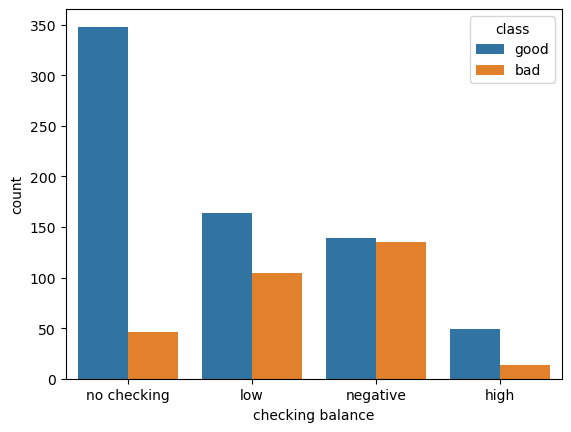

In [815]:
#Clean up the column
df['checking balance'] = df['checking_status'].str.replace("'","").str.replace('<0', 'negative').str.replace('0<=X<200', 'low').str.replace('>=200', 'high')

#Plot good and bad credits for each checking balance type 
counts = df.value_counts(['checking balance', 'class']).reset_index()
px.bar(counts, x='checking balance', y='count', color='class')
sns.barplot(counts, x='checking balance', y='count', hue='class')
plt.show()

#### Plot the % of bad credits for each type of checking balance
-----

  checking balance  count  good  bad
0             high     63    49   14
1              low    269   164  105
2         negative    274   139  135
3      no checking    394   348   46


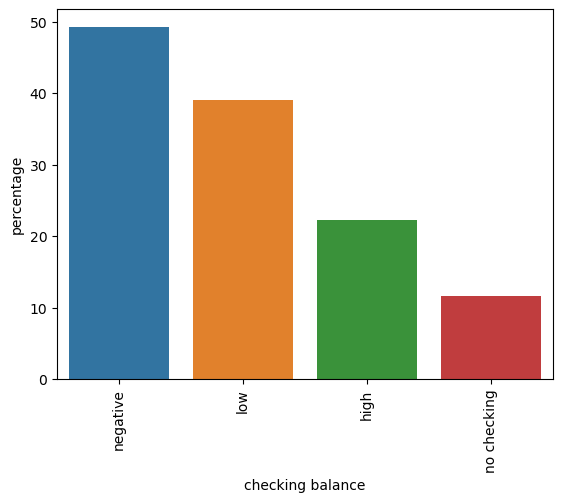

In [818]:
generate_chart('checking balance')

### Explore credit history



                   credit_history  count  good  bad
0                        all paid     49    21   28
1  critical/other existing credit    293   243   50
2              delayed previously     88    60   28
3                   existing paid    530   361  169
4             no credits/all paid     40    15   25


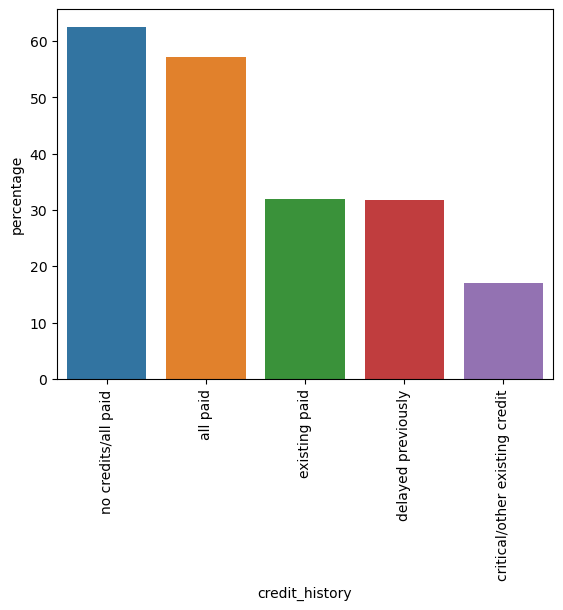

In [821]:
generate_chart('credit_history')

### Explore loan purpose

               purpose  count  good  bad
0             business     97    63   34
1   domestic appliance     12     8    4
2            education     50    28   22
3  furniture/equipment    181   123   58
4              new car    234   145   89
5                other     12     7    5
6             radio/tv    280   218   62
7              repairs     22    14    8
8           retraining      9     8    1
9             used car    103    86   17


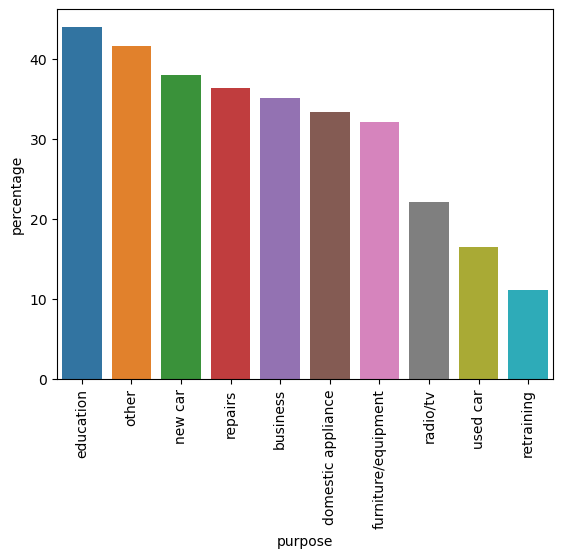

In [825]:
generate_chart('purpose')

                         job  count  good  bad
0  high qualif/self emp/mgmt    148    97   51
1                    skilled    630   444  186
2    unemp/unskilled non res     22    15    7
3         unskilled resident    200   144   56


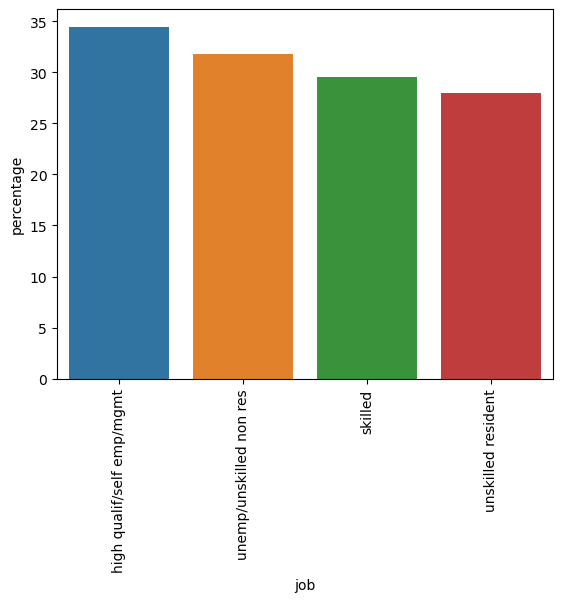

In [827]:
generate_chart('job')

     savings_status  count  good  bad
0        100<=X<500    103    69   34
1       500<=X<1000     63    52   11
2              <100    603   386  217
3            >=1000     48    42    6
4  no known savings    183   151   32


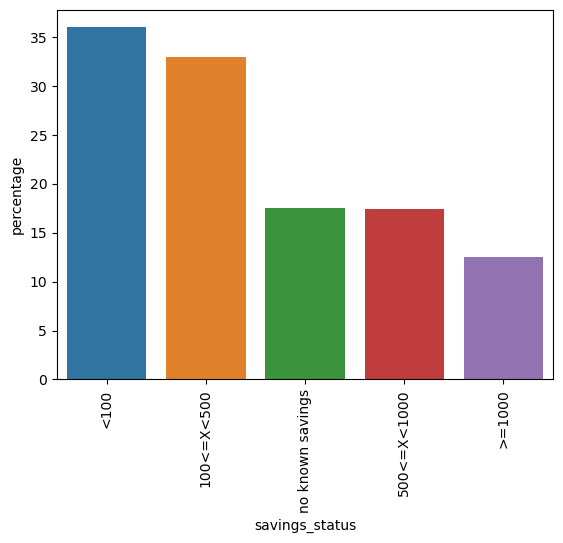

In [831]:
generate_chart('savings_status')

   employment  count  good  bad
0      1<=X<4    339   235  104
1      4<=X<7    174   135   39
2          <1    172   102   70
3         >=7    253   189   64
4  unemployed     62    39   23


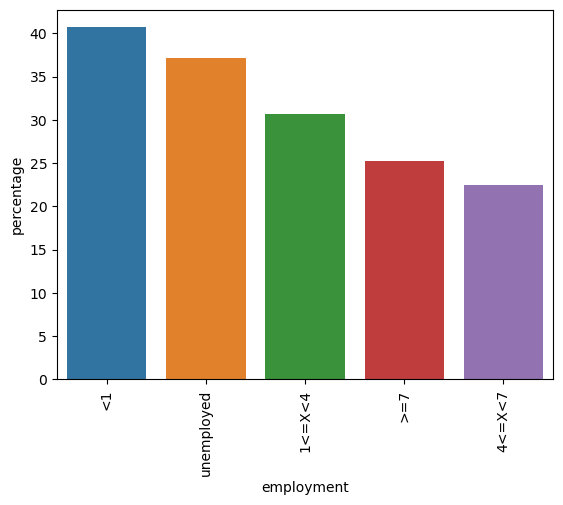

In [833]:
generate_chart('employment')

      personal_status  count  good  bad
0  female div/dep/mar    310   201  109
1        male div/sep     50    30   20
2        male mar/wid     92    67   25
3         male single    548   402  146


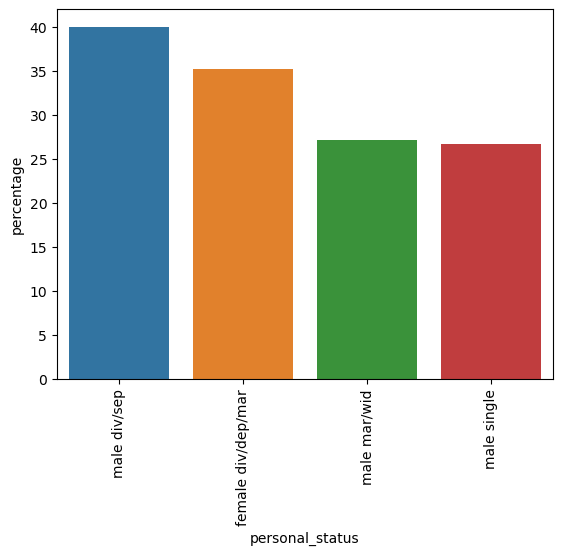

In [869]:
counts = generate_chart('personal_status')

In [891]:
counts_male = counts[counts['personal_status'].str.startswith('male')];
counts_female = counts[counts['personal_status'].str.startswith('female')];
print(counts_male['bad'].sum()/counts_male['count'].sum())
print(counts_female['bad'].sum()/counts_female['count'].sum())

0.2768115942028985
0.35161290322580646


  foreign_worker  count  good  bad
0             no     37    33    4
1            yes    963   667  296


,foreign_worker,count,good,bad,percentage
1,yes,963,667,296,30.737279
0,no,37,33,4,10.810811


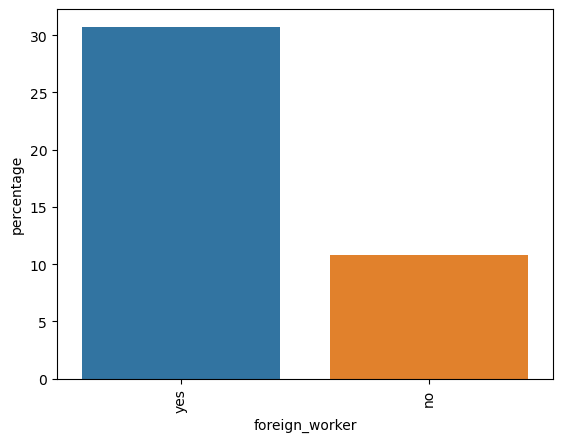

In [895]:
generate_chart('foreign_worker')